# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

###  1. Открываем файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t' )
data.info()
from IPython.display import display 
display(data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8109,5,3490000.0,42.45,2017-08-11T00:00:00,2,2.51,8.0,28.31,7,NaN,...,8.0,NaN,Санкт-Петербург,19420.0,15580.0,1.0,431.0,1.0,896.0,183.0
19175,8,3580000.0,50.00,2017-06-02T00:00:00,4,NaN,5.0,37.00,2,NaN,...,5.0,NaN,Санкт-Петербург,13984.0,15063.0,1.0,622.0,0.0,NaN,225.0
15780,9,12990000.0,119.60,2017-03-13T00:00:00,3,3.00,5.0,36.40,4,False,...,64.0,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,NaN
20722,10,3150000.0,29.00,2018-10-12T00:00:00,1,2.96,9.0,15.00,4,NaN,...,7.0,NaN,Санкт-Петербург,13029.0,14789.0,0.0,NaN,1.0,852.0,16.0
14671,9,2880000.0,40.00,2018-08-10T00:00:00,1,NaN,16.0,NaN,14,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,44.0
19452,5,9500000.0,76.80,2019-04-11T00:00:00,3,NaN,NaN,NaN,10,NaN,...,NaN,NaN,Санкт-Петербург,36628.0,14780.0,0.0,NaN,0.0,NaN,NaN
16676,14,4300000.0,49.10,2019-02-12T00:00:00,2,2.90,2.0,34.60,1,NaN,...,5.5,NaN,Санкт-Петербург,21447.0,11881.0,1.0,275.0,0.0,NaN,NaN
14219,2,4200000.0,81.00,2016-05-16T00:00:00,3,NaN,24.0,52.00,8,False,...,11.0,2.0,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,49.0
13690,7,3500000.0,71.00,2016-06-23T00:00:00,3,2.75,2.0,45.60,1,False,...,8.0,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
3617,11,5750000.0,53.00,2017-08-30T00:00:00,2,NaN,18.0,30.00,10,NaN,...,8.9,NaN,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,93.0


### Вывод

Дана таблица, состоящая из 1 столбца и 23699 строк. В 2 столбцах есть пропуски в данных. По типу данных столбец строка. Судя по данным о таблице возможно при выгрузке данных стобцы склеились и записались в одну ячейку.

### 2. Предобработка данных

In [2]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                     'parks_around3000': 'parks_around_3km',
                     'ponds_around3000': 'ponds_around_3km'}, inplace=True) #переименование столбцов для удобства

print('Количество пропусков: ', data.isna().sum())


Количество пропусков:  total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
# высота потолков
data['ceiling_height'] = data['ceiling_height'].fillna(0)
ceiling_height_median = data['ceiling_height'].median() 

#пропуски заменяем на медианное значение
data.loc[(data['ceiling_height'] > 6) | (data['ceiling_height'] < 2.5),
         'ceiling_height'] = ceiling_height_median         
#print(ceiling_height_median)


# количество этажей
data['floors_total'] = data['floors_total'].fillna(0)

# заменяем на целочисленный тип данных, данные не могут иметь дробное значение
data['floors_total'] = data['floors_total'].astype('int64')


# жилая площадь
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

# апартаменты
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna('NAN') 

# площадь кухни
data['kitchen_area'] = data['kitchen_area'].fillna(0)

# балкон
# заменяем на 0, скорее всего балконы отсутствуют
data['balcony'] = data['balcony'].fillna(0) 

# заменяем на целочисленный тип данных, данные не могут иметь дробное значение
data['balcony'] = data['balcony'].astype('int64')



In [4]:
# приведем в порядок  населенные пункты, разделим на 2 столбца: тип населенного пункта, локация
data['locality_name'] = data['locality_name'].fillna('нет данных')

def locality_red(locality_name):
    if 'посёлок' in locality_name:
        locality_name = locality_name.replace('посёлок', 'поселок')
        return locality_name
    return locality_name
    
data['locality_name'] = data['locality_name'].apply(locality_red)  



#объединяем типы населенных пунктов, записанных по-разному   
def locality_group(locality_name): 
    if 'городской поселок ' in  locality_name:
        locality_name = locality_name.replace('городской поселок ', 'пгт/T')
        return locality_name
    if 'поселок городского типа ' in  locality_name:
        locality_name = locality_name.replace('поселок городского типа ', 'пгт/T')
        return locality_name  
    if 'садоводческое некоммерческое товарищество ' in  locality_name:
        locality_name = locality_name.replace('садоводческое некоммерческое товарищество ', 'снт/T')
        return locality_name
    if 'садовое товарищество ' in  locality_name:
        locality_name = locality_name.replace('садовое товарищество ', 'снт/T')
        return locality_name
    if 'поселок ' in  locality_name:
        locality_name = locality_name.replace('поселок ', 'поселок/T')
        return locality_name
    if 'деревня ' in  locality_name:
        locality_name = locality_name.replace('деревня ', 'деревня/T')
        return locality_name
    if 'село ' in  locality_name:
        locality_name = locality_name.replace('село ', 'село/T')
        return locality_name
    else:
        locality_name = 'город/T' + locality_name
        return locality_name
     
data['locality_name'] = data['locality_name'].apply(locality_group) 
data2 = data['locality_name'].str.split('/T', expand=True)
display(data2.sample(5)) 

data['locality_type'] = data2[0]
data['locality'] = data2[1]


display(data.sample(5)) 
 

,0,1
18160,город,Санкт-Петербург
4245,город,Санкт-Петербург
19946,поселок,Сельцо
1804,город,Санкт-Петербург
6067,город,Пушкин


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,locality_type,locality
14213,11,9500000.0,62.0,2018-11-22T00:00:00,1,2.50,6,42.0,2,True,...,город/TСанкт-Петербург,25439.0,6355.0,1.0,375.0,0.0,NaN,97.0,город,Санкт-Петербург
10452,12,4750000.0,33.6,2016-06-14T00:00:00,1,2.75,15,16.9,10,True,...,город/TСанкт-Петербург,27573.0,9436.0,1.0,714.0,0.0,NaN,1015.0,город,Санкт-Петербург
4256,16,4450000.0,34.0,2016-01-26T00:00:00,1,2.50,9,18.0,3,False,...,город/TСанкт-Петербург,48815.0,15994.0,0.0,NaN,0.0,NaN,175.0,город,Санкт-Петербург
9565,10,4000000.0,41.3,2017-08-22T00:00:00,3,2.50,5,29.3,4,True,...,город/TСанкт-Петербург,11672.0,13219.0,0.0,NaN,1.0,871.0,546.0,город,Санкт-Петербург
13116,1,3885000.0,63.6,2016-06-12T00:00:00,2,2.65,9,38.4,1,False,...,поселок/TШушары,19740.0,30143.0,0.0,NaN,0.0,NaN,88.0,поселок,Шушары


In [5]:
# количество парков

data['parks_around_3km'] = data['parks_around_3km'].fillna(data['parks_around_3km'].median())

# заменяем на целочисленный тип данных, данные не могут иметь дробное значение
data['parks_around_3km'] = data['parks_around_3km'].astype('int64')


# расстояние до парков
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

# количество водоемов
data['ponds_around_3km'] = data['ponds_around_3km'].fillna(data['ponds_around_3km'].median())

# заменяем на целочисленный тип данных, данные не могут иметь дробное значение
data['ponds_around_3km'] = data['ponds_around_3km'].astype('int64')


# расстояние до водоемов
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())


# дни публикации
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

# заменяем на целочисленный тип данных, данные не могут иметь дробное значение
data['days_exposition'] = data['days_exposition'].astype('int64')


print('')
data.info()
print('')
print('Количество дубликатов: ', data.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3km        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_3km    

In [6]:

# расстояние до аэропорта

data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

# расстояние до центра города
city_centers_nearest_median = data['city_centers_nearest'].median()
data['city_centers_nearest']= data['city_centers_nearest'].fillna(city_centers_nearest_median)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around_3km        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_3km     

### Вывод

При предобработке даннных для удобства переименованы 3 стобца: столбец "cityCenters_nearest" в "city_centers_nearest", 
"parks_around3000" в "parks_around_3km", "ponds_around3000" в "ponds_around_3km". Методом isna().sum() находим количество пропущенных данных в каждом столбце.Далее начинаем обработку просков по каждому столбцу. По скольку в столбце с высотой потолков  достаточно большое количество пропуской, то просто от них избавиться было бы неправильно и поэтому пропуски заменяем на медианные значения. Дополнительно проверяем данные на ошибки(потолок в жилом помещее не может быть ниже 2,5м и скорее всего не выше 6м) методом индексации, заменяем ошибочные значения на медианные. Для столбцов "комнаты", "этаж", "количество водоемов", "количество парков", "балконы", "дни публикации" изменяем тип данных на целочиленные( не может быть 2.5 балкона или 1.8 парка). Для столбца с населенными пунктами пропуски заменяем на "нет данных". Далее наводим порядок путем категоризации и разделения на 2 столбца. Данное решение нам позволит быстро сортировать объявления по населенному пункту. Для всех остальных пропусков принято решение заменить на медианные значения.

### 3. Добавим данные в таблицу

In [7]:
# расчет цены за квадратный метр
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2) 
display(data.sample(10)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,locality_type,locality,square_meter_price
1882,18,9200000.0,79.0,2017-04-20T00:00:00,3,2.50,16,45.0,1,True,...,44132.0,10914.0,0,455.0,0,502.0,79,город,Санкт-Петербург,116455.70
3849,17,7800000.0,61.0,2018-11-05T00:00:00,2,2.50,6,39.0,2,True,...,26815.0,5517.0,1,210.0,0,502.0,80,город,Санкт-Петербург,127868.85
11329,17,95000000.0,190.0,2019-02-10T00:00:00,5,3.00,7,130.0,6,True,...,21179.0,1032.0,3,238.0,3,31.0,18,город,Санкт-Петербург,500000.00
12281,16,5600000.0,71.1,2018-10-02T00:00:00,3,2.50,5,42.0,3,True,...,26726.0,13098.5,0,455.0,1,502.0,61,город,Сосновый Бор,78762.31
20030,6,5500000.0,39.0,2015-05-20T00:00:00,1,2.50,24,18.0,4,True,...,26726.0,13098.5,0,455.0,1,502.0,565,деревня,Кудрово,141025.64
8175,13,690000.0,45.0,2018-07-14T00:00:00,2,2.60,5,31.0,4,True,...,26726.0,13098.5,0,455.0,1,502.0,27,город,Сланцы,15333.33
16948,9,2700000.0,35.4,2016-03-24T00:00:00,1,2.50,7,19.2,7,True,...,66743.0,48469.0,0,455.0,2,76.0,225,город,Кронштадт,76271.19
15198,7,5099000.0,47.0,2016-02-12T00:00:00,2,2.55,9,30.0,3,False,...,15910.0,11015.0,1,228.0,1,620.0,350,город,Санкт-Петербург,108489.36
15565,15,9500000.0,68.0,2019-03-11T00:00:00,2,3.15,4,38.5,1,True,...,21562.0,2849.0,3,184.0,1,944.0,95,город,Санкт-Петербург,139705.88
18568,13,2100000.0,55.0,2017-06-10T00:00:00,2,2.60,5,31.5,5,True,...,26726.0,13098.5,0,455.0,1,502.0,320,пгт,Советский,38181.82


In [8]:
# превращаем стобец из строкового значения в дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.info()
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

display(data.sample(10)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23699 non-null float64
parks_around_3km        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around_

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,locality_type,locality,square_meter_price,week_day,month,year
1975,14,7000000.0,62.00,2018-09-12,2,2.50,25,40.00,25,True,...,455.0,0,502.0,90,город,Санкт-Петербург,112903.23,2,9,2018
21289,15,3200000.0,38.50,2017-07-14,1,2.50,5,17.20,5,True,...,455.0,0,502.0,24,поселок,Шушары,83116.88,4,7,2017
19585,19,1400000.0,40.00,2018-10-30,1,2.50,5,17.50,5,True,...,455.0,1,502.0,20,поселок,станции Громово,35000.00,1,10,2018
17329,2,2815000.0,29.84,2018-08-19,1,2.50,18,14.02,13,True,...,455.0,1,502.0,121,поселок,Мурино,94336.46,6,8,2018
5680,13,3950000.0,36.00,2017-12-01,1,2.50,25,14.70,11,True,...,294.0,2,489.0,45,город,Санкт-Петербург,109722.22,4,12,2017
6481,6,2350000.0,30.00,2019-03-11,1,2.50,9,30.00,2,True,...,455.0,1,502.0,45,город,Сосновый Бор,78333.33,0,3,2019
16761,14,6900000.0,48.80,2018-02-27,1,3.00,5,16.40,5,True,...,122.0,2,261.0,286,город,Санкт-Петербург,141393.44,1,2,2018
19046,16,5700000.0,81.10,2018-11-13,4,2.65,9,57.30,1,True,...,455.0,0,502.0,23,город,Санкт-Петербург,70283.60,1,11,2018
13729,14,20300000.0,170.00,2017-11-26,3,3.40,6,140.00,4,True,...,388.0,1,189.0,104,город,Санкт-Петербург,119411.76,6,11,2017
22517,31,9000000.0,82.60,2018-02-22,3,3.00,5,52.70,5,True,...,91.0,1,691.0,95,город,Санкт-Петербург,108958.84,3,2,2018


In [9]:
# группирование даннх по этажам
def floor_group(row): 
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другое'

data['floor_group'] = data.apply(floor_group, axis=1) 

display(data.sample(10)) 




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,locality_type,locality,square_meter_price,week_day,month,year,floor_group
16790,9,6500000.0,72.00,2018-08-31,3,3.00,5,50.40,5,True,...,0,502.0,230,город,Санкт-Петербург,90277.78,4,8,2018,последний
17141,10,8000000.0,74.00,2017-06-12,3,2.50,10,30.00,4,True,...,0,502.0,331,город,Санкт-Петербург,108108.11,0,6,2017,другое
17416,3,9860000.0,89.30,2016-07-08,3,2.50,11,49.70,9,True,...,1,223.0,858,город,Санкт-Петербург,110414.33,4,7,2016,другое
23354,18,900000.0,42.60,2018-02-26,2,2.50,2,28.00,1,True,...,1,502.0,219,деревня,Тихковицы,21126.76,0,2,2018,первый
16682,9,3600000.0,31.00,2017-07-28,1,2.50,9,16.00,2,True,...,0,502.0,88,город,Санкт-Петербург,116129.03,4,7,2017,другое
16050,4,3500000.0,73.00,2017-07-05,3,2.50,5,50.00,2,True,...,1,502.0,45,город,Приморск,47945.21,2,7,2017,другое
5639,3,3700000.0,45.20,2017-06-14,2,2.55,5,28.90,4,True,...,3,303.0,498,город,Петергоф,81858.41,2,6,2017,другое
13243,5,3450000.0,57.00,2016-03-09,2,2.50,7,28.70,1,True,...,1,502.0,602,город,Гатчина,60526.32,2,3,2016,первый
3893,7,6800000.0,64.30,2017-02-13,2,3.20,6,41.05,3,True,...,1,262.0,435,город,Санкт-Петербург,105754.28,0,2,2017,другое
14662,9,5950000.0,64.69,2019-04-22,1,2.70,25,17.97,1,True,...,1,502.0,95,город,Кудрово,91977.12,0,4,2019,первый


In [10]:
# соотношение жилой и общей площади, отношение площади кухни к общей
data['living_area_share'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_share'] = round(data['kitchen_area'] / data['total_area'], 2)
display(data.sample(10)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_type,locality,square_meter_price,week_day,month,year,floor_group,living_area_share,kitchen_area_share
14673,13,4600000.0,46.20,2017-11-20,1,2.55,16,19.20,16,True,...,8,город,Санкт-Петербург,99567.10,0,11,2017,последний,0.42,0.23
15633,4,6420000.0,67.00,2015-09-18,2,2.50,24,38.00,11,True,...,311,город,Санкт-Петербург,95820.90,4,9,2015,другое,0.57,0.18
15163,23,5329100.0,66.20,2018-02-20,2,2.75,23,34.60,19,True,...,98,деревня,Кудрово,80500.00,1,2,2018,другое,0.52,0.20
22512,6,3600000.0,45.00,2017-06-07,2,2.50,5,30.00,5,True,...,93,город,Санкт-Петербург,80000.00,2,6,2017,последний,0.67,0.16
20623,10,3490000.0,38.10,2016-02-19,1,2.80,16,17.00,7,False,...,161,поселок,Мурино,91601.05,4,2,2016,другое,0.45,0.27
7045,17,18500000.0,153.30,2018-02-19,5,3.30,5,85.10,4,True,...,110,город,Санкт-Петербург,120678.41,0,2,2018,другое,0.56,0.08
12982,1,8800000.0,66.89,2019-04-18,2,2.65,19,41.34,5,False,...,95,город,Санкт-Петербург,131559.28,3,4,2019,другое,0.62,0.17
2110,0,2400000.0,29.00,2017-08-31,1,2.50,9,14.00,6,True,...,139,город,Колпино,82758.62,3,8,2017,другое,0.48,0.24
16779,5,2350000.0,30.10,2017-09-02,1,2.60,9,17.70,3,True,...,120,город,Санкт-Петербург,78073.09,5,9,2017,другое,0.59,0.21
5669,4,4400000.0,50.00,2017-08-08,2,2.50,9,21.30,3,True,...,267,город,Санкт-Петербург,88000.00,1,8,2017,другое,0.43,0.14


### Вывод

В таблицу добавле столбец с ценоами за квадратный метр. Стобец с датами публикаций конвертирован из строкового типа данных в даты.  Также добавлены столбцы с днем недели, месяцем и годом публикации объявления. Сгруппированы данные по этажам, что позволит в дальнейшем использовать для анализа влияния этажа на стоимость жилья. добавлены столбцы с  долями жилой площади и кухни из общей площади квартир.

### 4. Проведем исследовательский анализ данных и выполните инструкции:

#### 4.1. Исследование площади, цены, числа комнат, высоты потолков:

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    23699.000000
mean         2.638933
std          0.243718
min          2.500000
25%          2.500000
50%          2.500000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0103bb3150>]],
      dtype=object)

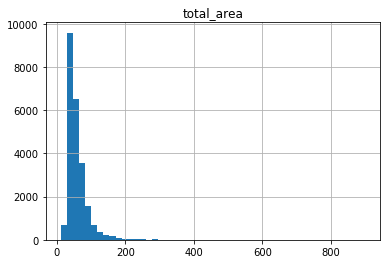

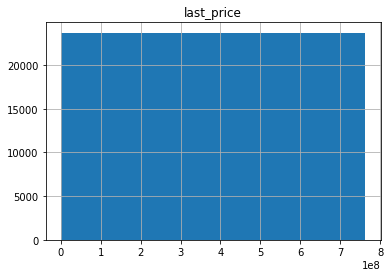

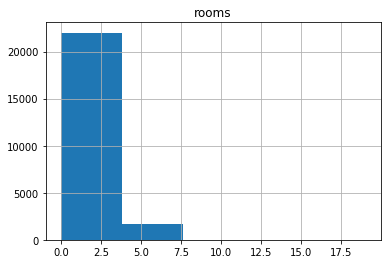

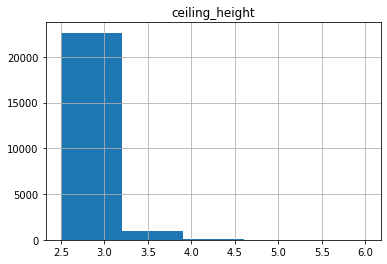

In [11]:
#Исследование площади, цены, числа комнат, высоты потолков

print(data['total_area'].describe())
data.hist('total_area', bins = 50)
print('')

print(data['last_price'].describe())
data.hist('last_price', bins = 1)
print('')

print(data['rooms'].describe())
data.hist('rooms', bins = 5)
print('')

print(data['ceiling_height'].describe())
data.hist('ceiling_height', bins = 5)


#### Вывод

Проведя анализ данных о площади, цене, числе комнат и высоте потолков, можно отметить следущее:
1. популярнее всего в продаже квартир квартиры площадью около 70 кв.м, есть подозрительные показатели(max900 кв.м и min 20кв.м)
2. средняя цена квартиры 4,65 млн, данные выглядят вполне адекватно, нет больших перепадов и визуально выбивающихся из общей массы показателей.
3. большинство выставленных на продажу квартир одно и двухкомнатные, что соответствует показателям по квадратуре и  стоимости основной массы продаваемого жилья. Есть и сильно выбивающиеся из общей массы показатели(19 комнат)
4. основная масса продаваемых квартир с высотой потолков 2.5-2.7м. Есть и довольно высокие потолки в 6м, возможно в продаже был лофт)

#### 4.2. Исследование сроков продаж

Медиана: 95.0
Max: 1580
Min: 1
count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64
95.0


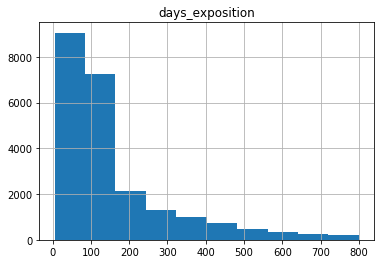

In [12]:
#Исследование сроков продаж
print('Медиана:', data['days_exposition'].median())
print('Max:', data['days_exposition'].max())
print('Min:', data['days_exposition'].min())
print(data['days_exposition'].describe())
data.hist('days_exposition', bins = 10, range=(5,800))
print(data['days_exposition'].median())

#### Вывод

При изучении данных о сроках продажи квартир видим, что  основная масса квартир продается в среднем от 0 до 7 месяцев. Продажи, совершенные до 3х месяцев считаются быстрыми, а после года необычо долгими. 

#### 4.3  Работа с выбросами

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fb349d50>]],
      dtype=object)

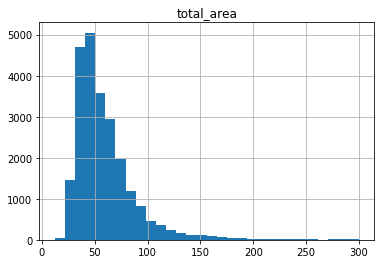

In [13]:
#Убираем редкие и выбивающиеся значения
#Площадь квартир
data.loc[data['total_area']> 300, 'total_area'] = data['total_area'].median()
data.hist('total_area', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fb237850>]],
      dtype=object)

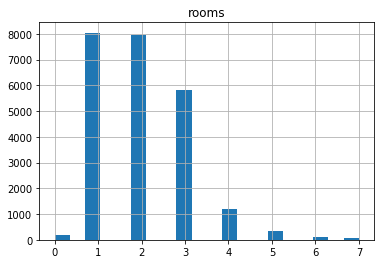

In [14]:
#Количество комнат
data.loc[data['rooms']> 7, 'rooms'] = data['rooms'].median()
data.hist('rooms', bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fb2160d0>]],
      dtype=object)

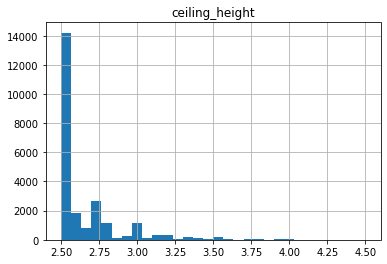

In [15]:
#Высота потолков
data.loc[data['ceiling_height']> 4.6, 'ceiling_height'] = data['ceiling_height'].median()
data.hist('ceiling_height', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00fb0c1a10>]],
      dtype=object)

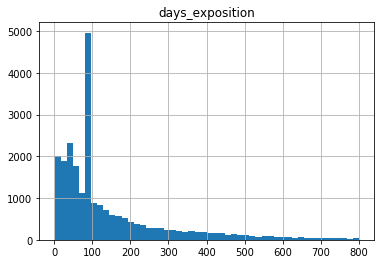

In [16]:
#Сроки продаж
data.loc[data['days_exposition']> 800, 'days_exposition'] = data['days_exposition'].median()
data.hist('days_exposition', bins = 50)



#### Вывод

С помощью гистограмм, индексации и медианных значений мы избавились от выбивающихся из общей картины данных, тем самым приблизиль к более реалистичным данным.

#### 4.4 Оценка зависимости цены от площади

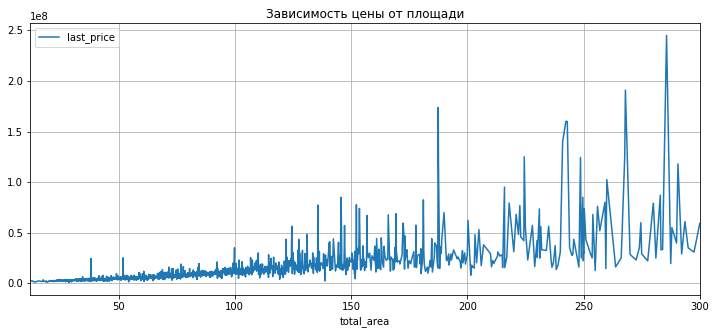

In [17]:
#зависимость цены от площади

data.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                               title = 'Зависимость цены от площади') 


#### Вывод

Для оценки зависимости цены от площади строим график. В результате получаем достаточно четкую картину: с увеличением площади, растет и цена.

#### 4.5 Оценка зависимости цены от числа комнат

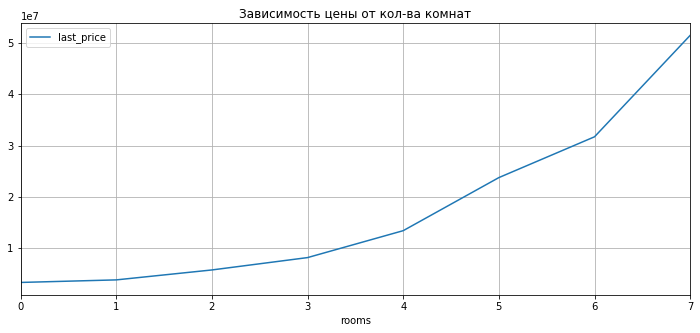

In [18]:
#зависимость цены от числа комнат

data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                          title='Зависимость цены от кол-ва комнат') 

#### Вывод

На построенном графике отчетливо видно как увеличивается цена с ростом количества комнат

#### 4.6 Оценка зависимости цены от удалённости от центра

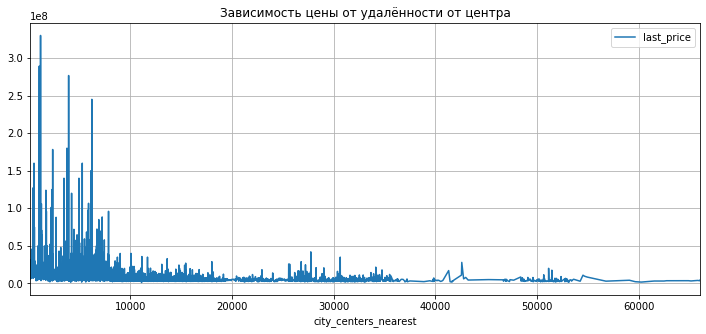

In [19]:
#зависимость цены от удалённости от центра
data.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                                         title='Зависимость цены от удалённости от центра') 

#### Вывод

Цена и правда зависит от удаленности от центра: чем дальше от центра, тем дешевле жилье.

#### 4.7 Оценка зависимости цены от этажа

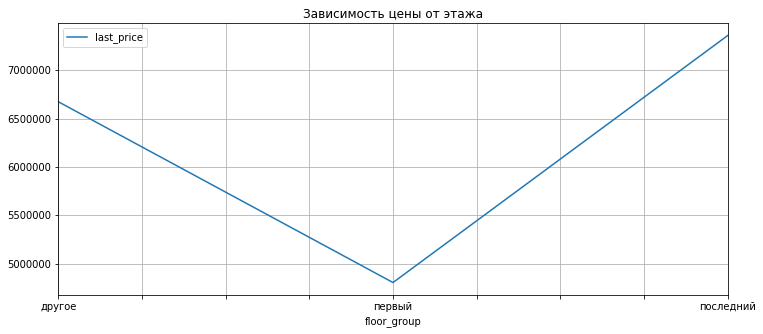

In [20]:
#зависимость цены от этажа
data.pivot_table(index='floor_group', values='last_price').plot(grid=True, figsize=(12, 5), 
                                                                title='Зависимость цены от этажа') 

#### Вывод

Судя по графику первый этаж самый непривлекательный, поэтому и дешевле всего. А последний этаж, наоборот, комфортнее для проживания и цена на него выше.

#### 4.8 Оценка зависимости цены от даты размещения

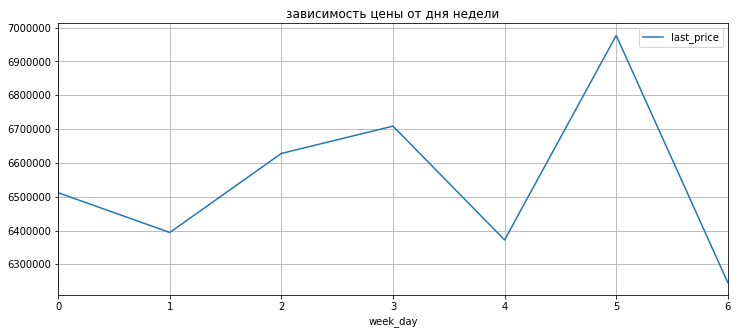

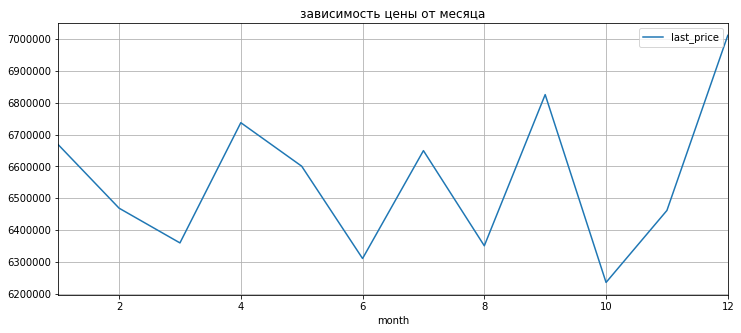

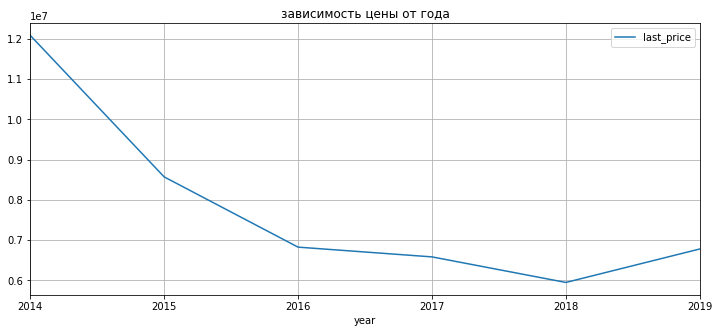

In [21]:
#зависимость цены от даты размещения
index_dic ={'week_day':'зависимость цены от дня недели', 'month':'зависимость цены от месяца', 'year':'зависимость цены от года'}
for k, v in index_dic.items(): 
    data.pivot_table(index=k, values='last_price').plot(grid=True, figsize=(12, 5), title=v)


#### Вывод

Изучив графики, выяснилось:
1. Самые дорогие квартиры по субботам, а самые дешевые выставляются по воскресеньям
2. В ноябре идет снижение стоимости жилья, а в январе повышение.
3. Самая высокая цена на жилье была в 2014году и с того момента прослеживается тенденция по снижению стоимости жилья.

#### 4.9 TOP - 10 населенных пунктов по количеству объявлений

In [22]:
top = data.pivot_table(index=['locality','locality_type'],values=['square_meter_price','last_price'], 
                 aggfunc = {'last_price': 'count', 'square_meter_price': 'mean'})
top_10 = top.sort_values(by = 'last_price', ascending=False).head(10)
top_10.columns = ['locality_count', 'sq_meter_price_mean']
display(top_10)


,,locality_count,sq_meter_price_mean
locality,locality_type,,
Санкт-Петербург,город,15721,114849.008793
Мурино,поселок,556,85681.762572
Шушары,поселок,440,78677.364318
Всеволожск,город,398,68654.473970
Пушкин,город,369,103125.819377
Колпино,город,338,75424.579112
Парголово,поселок,327,90175.913089
Гатчина,город,307,68746.146515
Кудрово,деревня,299,92473.547559


#### Вывод

Для определения топ-10 населенных пунктов по количеству объявлений делаем сводную таблицу, в ней высчитываем среднюю цену за квадратный метр в населенном пункте. Лидером топ-10 по стоимости за квадратный метр оказался Санкт-Петербург, минимальная цена в данном срезе принадлежит поселку Мурино.

#### 4.10 Определим центральную зону Санкт-Петербурга

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_type,locality,square_meter_price,week_day,month,year,floor_group,living_area_share,kitchen_area_share,city_cent_nearest_km
0,20,13000000.0,108.00,2019-03-07,3.0,2.70,16,51.00,8,True,...,город,Санкт-Петербург,120370.37,3,3,2019,другое,0.47,0.23,16.0
1,7,3350000.0,40.40,2018-12-04,1.0,2.50,11,18.60,1,True,...,поселок,Шушары,82920.79,1,12,2018,первый,0.46,0.27,19.0
2,10,5196000.0,56.00,2015-08-20,2.0,2.50,5,34.30,4,True,...,город,Санкт-Петербург,92785.71,3,8,2015,другое,0.61,0.15,14.0
3,0,64900000.0,159.00,2015-07-24,3.0,2.50,14,30.00,9,True,...,город,Санкт-Петербург,408176.10,4,7,2015,другое,0.19,0.00,7.0
4,2,10000000.0,100.00,2018-06-19,2.0,3.03,14,32.00,13,True,...,город,Санкт-Петербург,100000.00,1,6,2018,другое,0.32,0.41,8.0
5,10,2890000.0,30.40,2018-09-10,1.0,2.50,12,14.40,5,True,...,пгт,Янино-1,95065.79,0,9,2018,другое,0.47,0.30,13.0
6,6,3700000.0,37.30,2017-11-02,1.0,2.50,26,10.60,6,True,...,поселок,Парголово,99195.71,3,11,2017,другое,0.28,0.39,19.0
7,5,7915000.0,71.60,2019-04-18,2.0,2.50,24,30.00,22,True,...,город,Санкт-Петербург,110544.69,3,4,2019,другое,0.42,0.26,12.0
8,20,2900000.0,33.16,2018-05-23,1.0,2.50,27,15.43,26,True,...,поселок,Мурино,87454.76,2,5,2018,другое,0.47,0.27,13.0
9,18,5400000.0,61.00,2017-02-26,3.0,2.50,9,43.60,7,True,...,город,Санкт-Петербург,88524.59,6,2,2017,другое,0.71,0.11,15.0


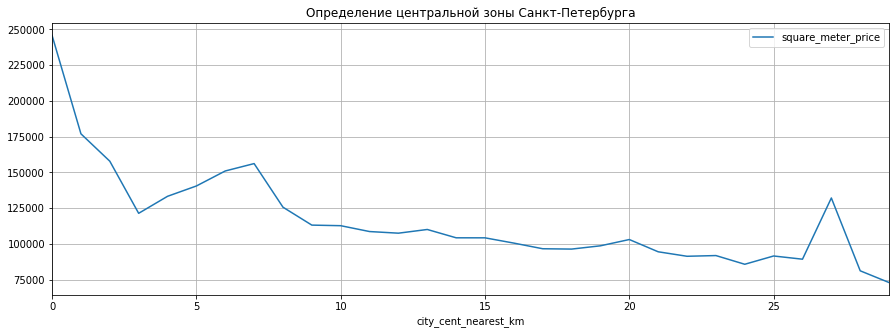

In [23]:
data['city_cent_nearest_km'] = round(data['city_centers_nearest']/1000)
display(data.head(10))
#print(data['city_cent_nearest_km'].max())
#print(data['city_cent_nearest_km'].min())
#print(data['city_cent_nearest_km'].unique())

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='city_cent_nearest_km', values='square_meter_price').plot(grid=True, figsize=(15, 5),
                                                                             title = 'Определение центральной зоны Санкт-Петербурга')




#### Вывод

С помощью графика определяем центральную зону Санкт-Петербурга, это - 8-10км 

#### 4.11 Проверим ряд зависиемостей

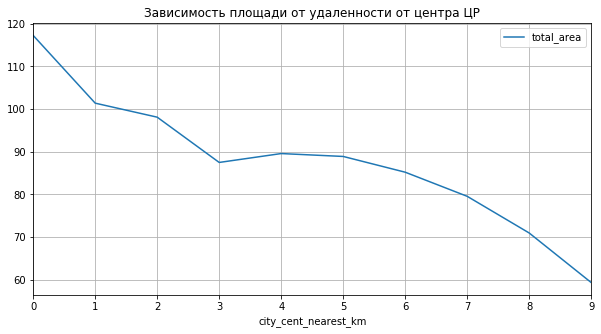

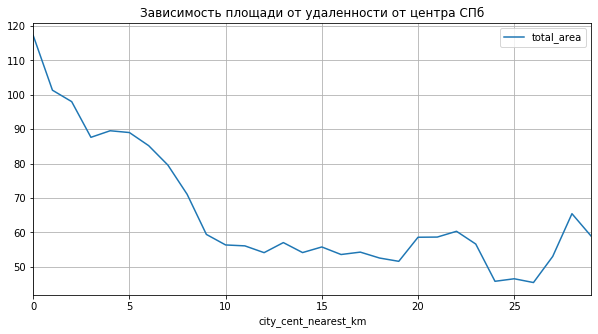

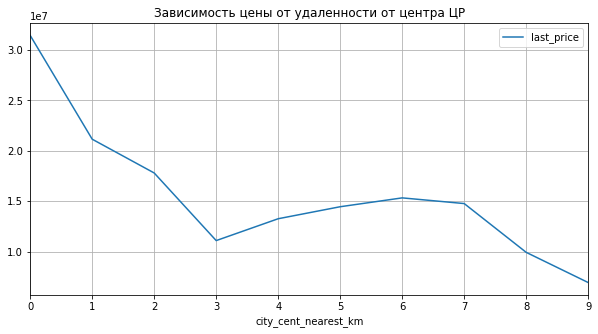

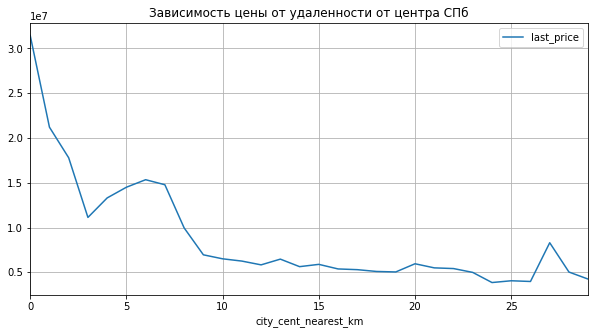

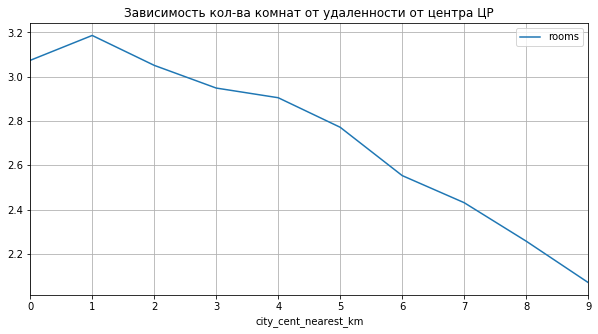

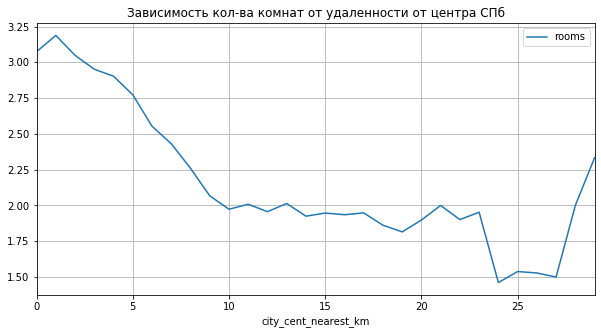

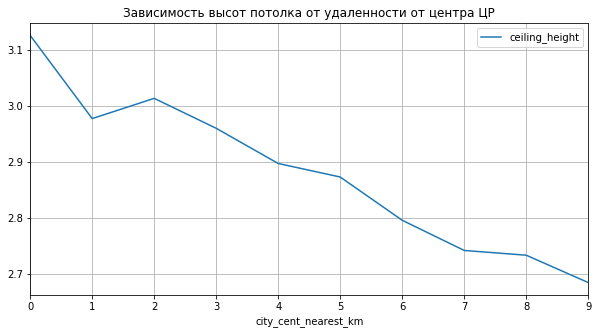

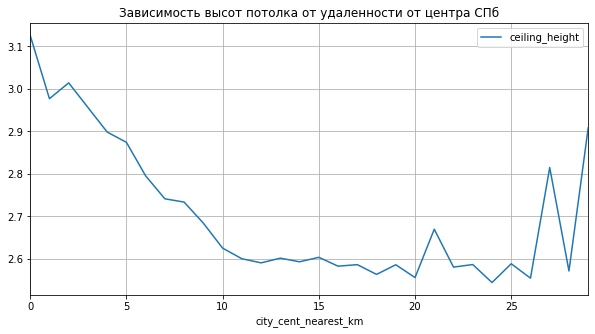

In [24]:
#по расстоянию
#print(data.columns)
data.query('city_cent_nearest_km < 10')\
.pivot_table(index='city_cent_nearest_km', 
             values=['total_area']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость площади от удаленности от центра ЦР')#центральный район
 
data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='city_cent_nearest_km', 
             values=['total_area']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость площади от удаленности от центра СПб')#СПб

data.query('city_cent_nearest_km < 10')\
.pivot_table(index='city_cent_nearest_km', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от удаленности от центра ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='city_cent_nearest_km', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от удаленности от центра СПб')#СПб

data.query('city_cent_nearest_km < 10')\
.pivot_table(index='city_cent_nearest_km', 
             values=['rooms']).plot(grid=True, figsize=(10, 5), 
                                    title = 'Зависимость кол-ва комнат от удаленности от центра ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='city_cent_nearest_km', 
             values=['rooms']).plot(grid=True, figsize=(10, 5), 
                                    title = 'Зависимость кол-ва комнат от удаленности от центра СПб')#СПб

data.query('city_cent_nearest_km < 10')\
.pivot_table(index='city_cent_nearest_km', 
             values=['ceiling_height']).plot(grid=True, figsize=(10, 5),
                                             title = 'Зависимость высот потолка от удаленности от центра ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='city_cent_nearest_km', 
             values=['ceiling_height']).plot(grid=True, figsize=(10, 5),
                                            title = 'Зависимость высот потолка от удаленности от центра СПб')#СПб




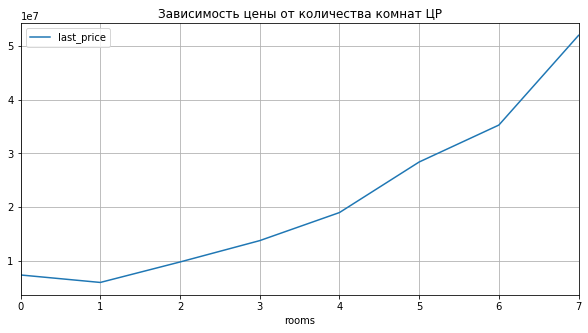

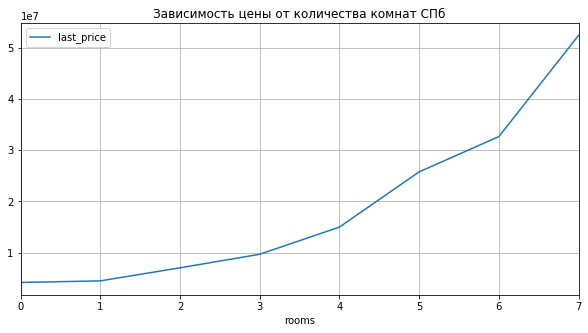

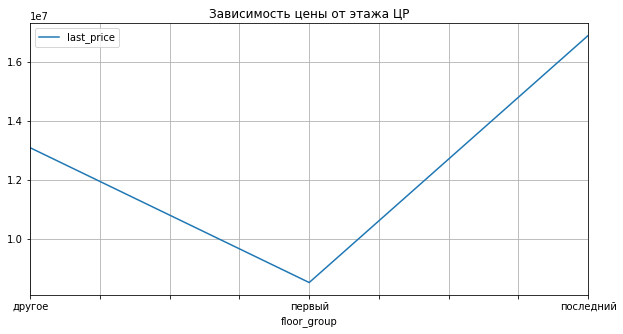

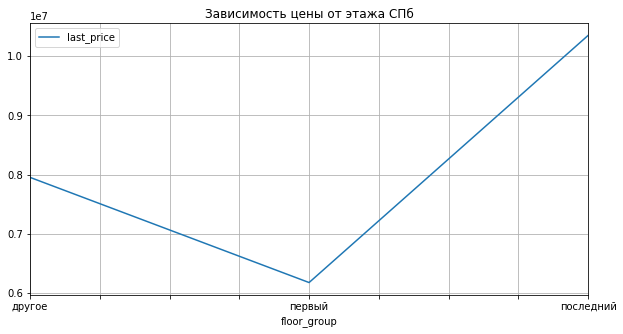

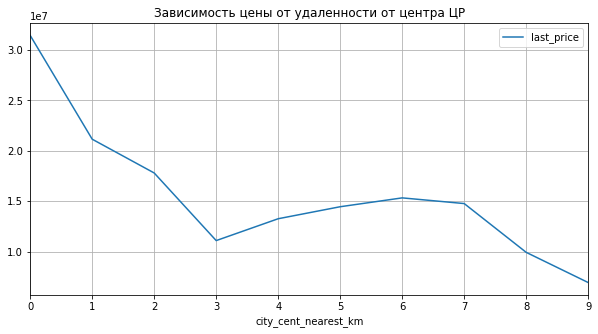

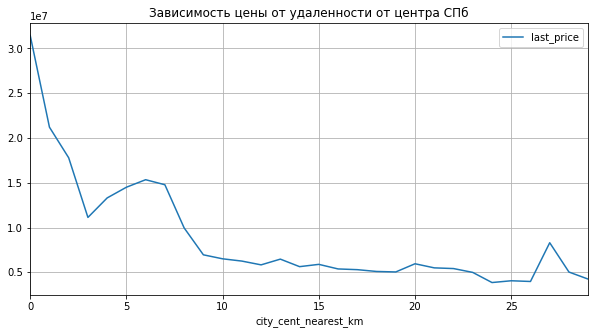

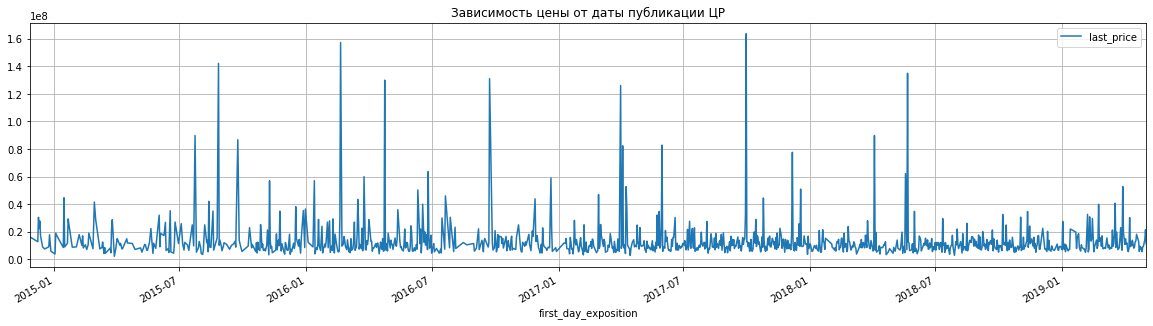

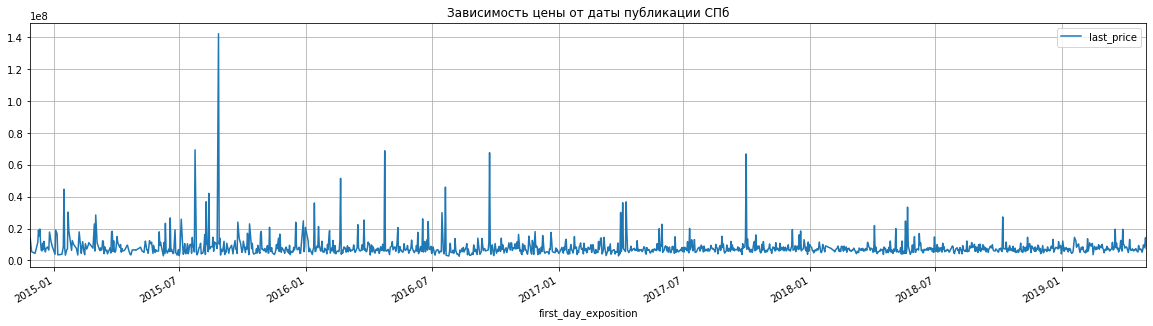

In [25]:
#по цене
data.query('city_cent_nearest_km < 10')\
.pivot_table(index='rooms', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от количества комнат ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='rooms', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от количества комнат СПб')#СПб

data.query('city_cent_nearest_km < 10')\
.pivot_table(index='floor_group', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от этажа ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='floor_group', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от этажа СПб')#СПб

data.query('city_cent_nearest_km < 10')\
.pivot_table(index='city_cent_nearest_km',
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от удаленности от центра ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='city_cent_nearest_km', 
             values=['last_price']).plot(grid=True, figsize=(10, 5), 
                                         title = 'Зависимость цены от удаленности от центра СПб')#СПб

data.query('city_cent_nearest_km < 10')\
.pivot_table(index='first_day_exposition', 
             values=['last_price']).plot(grid=True, figsize=(20, 5), 
                                         title = 'Зависимость цены от даты публикации ЦР')#центральный район

data.query('locality=="Санкт-Петербург"')\
.pivot_table(index='first_day_exposition', 
             values=['last_price']).plot(grid=True, figsize=(20, 5), 
                                         title = 'Зависимость цены от даты публикации СПб')#СПб





In [26]:
#анализ Кореляции СПБ
data_spb = data[data['locality']=='Санкт-Петербург'] 
corr_columns = {'rooms': 'между кол-вом комнат и ценой', 
                'total_area': 'между площадью и ценой', 
                'city_cent_nearest_km': 'между удаленностью от центра и ценой'}

for l, m in corr_columns.items():
    correlation = data_spb[l].corr(data_spb['last_price'])
    print('Коэффициент корреляции', m, correlation)

Коэффициент корреляции между кол-вом комнат и ценой 0.3431126082354209
Коэффициент корреляции между площадью и ценой 0.46612061814579486
Коэффициент корреляции между удаленностью от центра и ценой -0.2573367808786638


####  Вывод

Изучаем выборку по квартирам в центральном районе. Графики говорят о следующем:
1. Чем ближе к центру, тем площадь квартир больше
2. Чем ближе к центру, тем цены на квартиры выше
3. Количество комнат возрастает на расстоянни примерно 1 км от центра, но при этом по краям центрального района среднее количество комнат меньше. Скорее всего в данной ситуации нет зависимости количества комнат от местоположения жилья.
4. Самые высокие потолки в центре города, однако график не имеет четкой тенденции к возрастанию или убыванию. это говорит о возможном отсутствии зависимости потолков от местоположения квартиры.
5. Количество комнат очевидно влияет на стоимость: чем больше комнат, тем дороже квартира
6. График зависимости цены от этажа дает четко понять: чем ниже этаж, тем дешевле жильё
7. Удаленность от центра влияет на стоимость жилья: чем дальше от центра, тем дешевле.
8. Из графика по дате размещения объявлений прослеживается тенденция повышения стоимость жилья примерно в середине года.

Вцелом картина всего города от его центральной части совпадает.

Интерпритация результатов анализа кореляции данных по Санкт-Петербургу:
1. Коэффициент кореляции между кол-вом комнат и ценой = 0.34 говорит о том, что цена зависит от количества комнат, но не слишком сильно.
2. Коэффициент кореляции между площадью и ценой = 0.46 говорит о наличии связи, однако не слишком сильной.
3. Коэффициент кореляции между удаленностью от центра и ценой = -0.25 говорит о том, что при уменьшении показателя удаленности от центра (чем ближе к центру), растет цена.


### 5. Общий вывод

В ходе работы над проектом исходные данные прошли довольно масштабную предобработку.Разделение склеенных столбцов, замена пропусков, изменены типы данных согласно содержанию столбцов, проведена категоризация данных, добавлены дополнительные столбцы для удобства дальнейших расчетов и анализа ситуации на рынке жилья. При детальном изучении данных после обработки выяснилось:
1 . популярнее всего в продажах квартиры площадью около 70 кв.м, средняя цена квартиры 4,65 млн, большинство выставленных на продажу квартир одно и двухкомнатные, основная масса продаваемых квартир с высотой потолков 2.5-2.7м. Есть и довольно высокие потолки в 6м, возможно в продаже был лофт)
2. квартиры продаются в среднем от 0 до 7 месяцев. Продажи, совершенные до 3х месяцев считаются быстрыми, а после года необычо долгими.
3. выяснили зависимости. На рост цены за квадратный метр влияет площадь, количество комнат, удаленность от центра, этаж. День недели, месяц и год также оказывали влияние на стоимость жилья.
4. проведен анализ топ-10 населенных пунктов по количеству объявлений. Лидером по стоимости за квадратный метр оказался Санкт-Петербург, минимальная цена в данном срезе принадлежит поселку Мурино.

С помощью графика определена центральная зона Санкт-Петербурга, это - 0-3км. Посчитана средняя цена для каждого километра. По построенным графикам очевидны зависимости:
1. Чем ближе к центру, тем площадь квартир больше
2. Чем ближе к центру, тем цены на квартиры выше
3. Количество комнат возрастает на расстоянни примерно 1 км от центра, но при этом по краям центрального района среднее количество комнат меньше. Скорее всего в данной ситуации нет зависимости количества комнат от местоположения жилья.
4. Самые высокие потолки в центре города, однако график не имеет четкой тенденции к возрастанию или убыванию. это говорит о возможном отсутствии зависимости потолков от местоположения квартиры.
5. Количество комнат очевидно влияет на стоимость: чем больше комнат, тем дороже квартира
6. График зависимости цены от этажа дает четко понять: чем ниже этаж, тем дешевле жильё
7. Удаленность от центра влияет на стоимость жилья: чем дальше от центра, тем дешевле.
8. Из графика по дате размещения объявлений прослеживается тенденция повышения стоимость жилья примерно в середине года.